# Objective

Create a balanced league that complies with the constraints. This is, a league where the average skill rating of the players is roughly tge same amoung the teams. This can be measured by the standard deviation of the average skill rating of the teams.

# Requirements

Must implement:
 - the fitness function
 - at least 3 mutation operators
 - at least 2 crossover operators
 - at least 2 selection mechanisms

# Constraints

In [ ]:
c_structure = ["GK", "DF", "DF", "MF", "MF", "FW", "FW"]
c_team_per_player = 1
c_total_budget = 750 # €M

In [ ]:
class Player:
        # Constructor to initialize attributes

    def __init__(self, name: str, position: str, skill: int, salary: int):
        # self is a reference to the current instance of the class
        self.name = name
        self.position = position
        self.skill = skill
        self.salary = salary # Salary in €M

    def __repr__(self):
        return f"{self.name} ({self.position}) - Skill: {self.skill}, Salary: {self.salary}€M"

# Selection Algorithms
- Fitness Proportional Selection (Roulette Wheel)
- Rank Selection
- Tournament Selection

In [521]:
import random

# Fitness proportional selection (roulette wheel)
def sel_roulette(population, fitness, num=1):
    """
    Selects individuals from the population based on their fitness using roulette wheel selection.
    Args:
        population (list): The population of individuals.
        fitness (list): The fitness values of the individuals in the population.
        num (int): The number of individuals to select.
    """
    # P("Selecting individual i") = fitness(i) / sum(fitness(j) for j in population) -> Maximization
    # 1/P("Selecting individual i") -> Mini

    sum_fit = sum(fitness)
    prob = []
    for i in range(len(population)):
        prob.append(1/(fitness[i] / sum_fit))
    selected = random.choices(population, weights=prob, k=num)
    
    return selected

In [983]:
pop = ["Benfica", "Maritimo", "Estrela", "Sporting", "Andorra", "Lynx FC"]
gap = [50, 200, 30, 2, 300, 15]

# expected order = Sporting, Lynx FC, Benfica, Estrela, Maritimo, Andorra
sel_roulette(pop, gap)

['Sporting']

In [984]:
# Ranking selection
def sel_rank(population, fitness, num=1):
    """
    Selects individuals from the population based on their rank in fitness.
    Args:
        population (list): The population of individuals.
        fitness (list): The fitness values of the individuals in the population.
        num (int): The number of individuals to select.
    """
    # Sort the population by fitness
    sorted_pop = sorted(zip(population, fitness), key=lambda x: x[1], reverse=True) # Starts on Rank 1 for the worst fitness, and goes up to Rank n for the best fitness
    sum_rank = sum(range(1, len(sorted_pop) + 1)) # Sum of ranking indexes
    prob = []
    for i in range(len(sorted_pop)):
        prob.append((i + 1) / sum_rank)
    selected = random.choices([x[0] for x in sorted_pop], weights=prob, k=num)

    return selected

In [1001]:
rank_results_100 = sel_rank(pop, gap, 100)
rank_results_100

['Estrela',
 'Sporting',
 'Maritimo',
 'Sporting',
 'Maritimo',
 'Lynx FC',
 'Sporting',
 'Sporting',
 'Sporting',
 'Benfica',
 'Estrela',
 'Maritimo',
 'Lynx FC',
 'Estrela',
 'Andorra',
 'Lynx FC',
 'Maritimo',
 'Sporting',
 'Estrela',
 'Sporting',
 'Lynx FC',
 'Sporting',
 'Benfica',
 'Estrela',
 'Lynx FC',
 'Lynx FC',
 'Sporting',
 'Estrela',
 'Lynx FC',
 'Sporting',
 'Sporting',
 'Maritimo',
 'Sporting',
 'Lynx FC',
 'Benfica',
 'Sporting',
 'Sporting',
 'Sporting',
 'Sporting',
 'Estrela',
 'Maritimo',
 'Lynx FC',
 'Estrela',
 'Estrela',
 'Sporting',
 'Estrela',
 'Estrela',
 'Estrela',
 'Sporting',
 'Lynx FC',
 'Estrela',
 'Lynx FC',
 'Maritimo',
 'Sporting',
 'Sporting',
 'Sporting',
 'Sporting',
 'Andorra',
 'Maritimo',
 'Estrela',
 'Lynx FC',
 'Lynx FC',
 'Lynx FC',
 'Estrela',
 'Benfica',
 'Maritimo',
 'Sporting',
 'Sporting',
 'Lynx FC',
 'Lynx FC',
 'Benfica',
 'Lynx FC',
 'Sporting',
 'Lynx FC',
 'Estrela',
 'Maritimo',
 'Benfica',
 'Estrela',
 'Lynx FC',
 'Benfica',
 'Mar

In [1002]:
weel_results_100 = sel_roulette(pop, gap, 100)
weel_results_100

['Sporting',
 'Sporting',
 'Sporting',
 'Sporting',
 'Sporting',
 'Lynx FC',
 'Sporting',
 'Sporting',
 'Lynx FC',
 'Estrela',
 'Lynx FC',
 'Sporting',
 'Sporting',
 'Sporting',
 'Sporting',
 'Sporting',
 'Sporting',
 'Sporting',
 'Sporting',
 'Sporting',
 'Lynx FC',
 'Lynx FC',
 'Sporting',
 'Lynx FC',
 'Sporting',
 'Sporting',
 'Sporting',
 'Maritimo',
 'Lynx FC',
 'Sporting',
 'Sporting',
 'Sporting',
 'Lynx FC',
 'Sporting',
 'Sporting',
 'Sporting',
 'Sporting',
 'Lynx FC',
 'Sporting',
 'Sporting',
 'Sporting',
 'Estrela',
 'Sporting',
 'Lynx FC',
 'Benfica',
 'Sporting',
 'Sporting',
 'Sporting',
 'Sporting',
 'Sporting',
 'Sporting',
 'Sporting',
 'Sporting',
 'Sporting',
 'Estrela',
 'Sporting',
 'Lynx FC',
 'Sporting',
 'Sporting',
 'Sporting',
 'Sporting',
 'Sporting',
 'Sporting',
 'Sporting',
 'Sporting',
 'Sporting',
 'Maritimo',
 'Estrela',
 'Sporting',
 'Sporting',
 'Sporting',
 'Estrela',
 'Lynx FC',
 'Sporting',
 'Sporting',
 'Sporting',
 'Sporting',
 'Sporting',
 'Sp

In [ ]:
# Tournament selection
def sel_tournament(population, fitness, k, num=1):
    """
    Selects individuals from the population using tournament selection.
    Args:
        population (list): The population of individuals.
        fitness (list): The fitness values of the individuals in the population.
        k (int): The number of individuals in each tournament, this is, tournament size.
        num (int): The number of individuals to select.
    """
    selected = []
    
    for n in range(num):
        # Randomly select k individuals from the population
        tournament = random.sample(list(zip(population, fitness)), k)
        tournament.sort(key=lambda x: x[1])
        # Select the best individual from the tournament
        best_individual = tournament[0]
        selected.append(best_individual[0])

    return selected

In [1224]:
tourn_results_100 = sel_tournament(pop, gap, 3, 100)
tourn_results_100

['Sporting',
 'Sporting',
 'Estrela',
 'Sporting',
 'Lynx FC',
 'Sporting',
 'Sporting',
 'Sporting',
 'Estrela',
 'Lynx FC',
 'Lynx FC',
 'Sporting',
 'Lynx FC',
 'Sporting',
 'Sporting',
 'Sporting',
 'Sporting',
 'Lynx FC',
 'Lynx FC',
 'Sporting',
 'Sporting',
 'Lynx FC',
 'Sporting',
 'Lynx FC',
 'Sporting',
 'Estrela',
 'Benfica',
 'Estrela',
 'Sporting',
 'Lynx FC',
 'Estrela',
 'Sporting',
 'Lynx FC',
 'Sporting',
 'Lynx FC',
 'Estrela',
 'Lynx FC',
 'Sporting',
 'Sporting',
 'Sporting',
 'Lynx FC',
 'Sporting',
 'Sporting',
 'Sporting',
 'Sporting',
 'Estrela',
 'Estrela',
 'Sporting',
 'Estrela',
 'Sporting',
 'Lynx FC',
 'Lynx FC',
 'Estrela',
 'Sporting',
 'Sporting',
 'Benfica',
 'Sporting',
 'Lynx FC',
 'Lynx FC',
 'Sporting',
 'Estrela',
 'Lynx FC',
 'Lynx FC',
 'Lynx FC',
 'Lynx FC',
 'Sporting',
 'Lynx FC',
 'Lynx FC',
 'Sporting',
 'Estrela',
 'Estrela',
 'Benfica',
 'Lynx FC',
 'Estrela',
 'Lynx FC',
 'Lynx FC',
 'Lynx FC',
 'Sporting',
 'Sporting',
 'Lynx FC',
 'Est

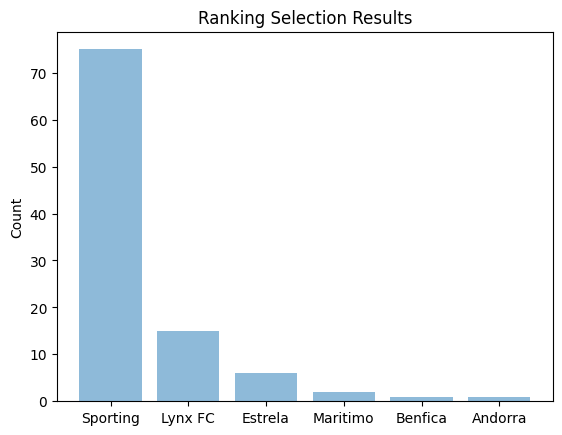

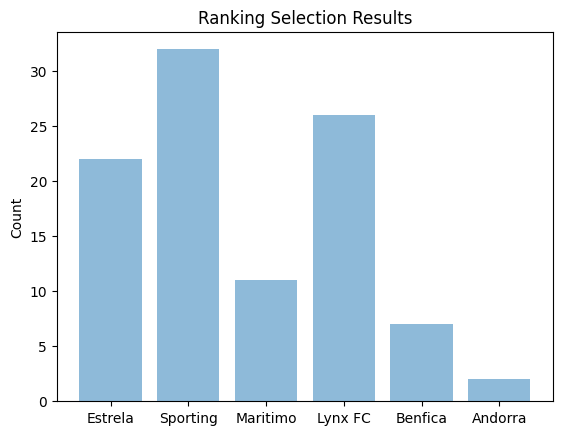

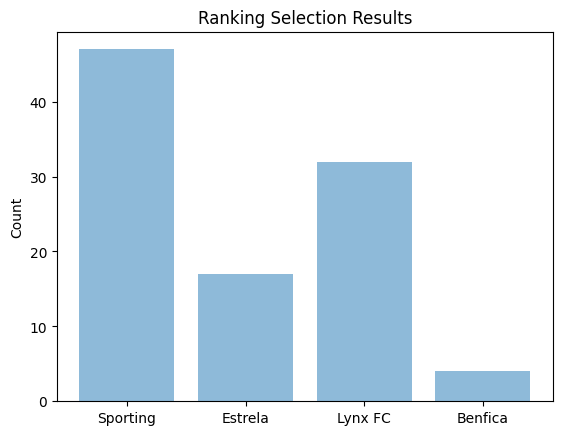

In [1227]:
# barplot the results

import matplotlib.pyplot as plt
import numpy as np

# make Y axis the count and X axis the names, use the results_100
def plot_results(results):
    counts = {}
    for result in results:
        if result in counts:
            counts[result] += 1
        else:
            counts[result] = 1

    names = list(counts.keys())
    values = list(counts.values())

    y_pos = np.arange(len(names))

    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, names)
    plt.ylabel('Count')
    plt.title('Ranking Selection Results')

    plt.show()

plot_results(weel_results_100)
plot_results(rank_results_100)
plot_results(tourn_results_100)
